# Zadanie 1
## Zestaw 7 zadanie komputerowe 1
Zadanie komputerowe 1. Załóż, że dysponujesz generatorem liczb losowych U z rozkładem
równomiernym na (0, 1). Używając tego rozkładu zaprojektuj algorytm realizujący generator liczb
losowych z rozkładem:
#### a) Bernoulliego z parametrem p
#### b) Dwumianowy z parametrami n, p

#### a)

In [1163]:
from scipy.stats import uniform
def bernoulli(p, s):
    return [1 if i <= p else 0 for i in uniform.rvs(loc=0, scale=1, size=s)]
# Aby wylosować s elementów o rozkładzie bernoulliego z prawdopodobieństwem p
# Dla pojedynczej liczby losowana jest wartość z przedziału (0,1)
# Za sukces przyjmowane jest wylosowanie wartości <= p

bernoulli(0.25, 4)

[1, 0, 0, 0]

#### b)

In [1164]:
import numpy as np
from scipy.stats import uniform
def dwumianowy(n, p, s):
    return [np.sum(uniform.rvs(loc=0, scale=1, size=n) <= p) for _ in range(s)]

# Aby wylosować s elementów o rozkładzie dwumianowym z prawdopodobieństwem p przy n próbach
# dla pojedyczej liczby lososane jest n liczb z rozkładu równomiernego (0,1)
# sumujemy liczbę zwycięstw gdzie za zwycięstwo uzanwane jest wylosowanie wartości <= p


dwumianowy(9, 0.3, 4)

[2, 3, 2, 0]

# Zadanie 2
## Zestaw 4 zadanie 12
 Napisz program, który będzie obliczał skumulowaną funkcję rozkładu dla
zmiennej o rozkładzie dwumianowym, tzn. wartość
#### $$ P\{𝑋 ≤ 𝑖\} = \sum_{k=0}^i\binom{n}{k}p^k(1-p)^{n-k} \; dla\; i=0,1,...,n $$
W tym celu oblicz i wykorzystaj zależność pomiędzy 𝑃{𝑋 = 𝑘 + 1} a 𝑃{𝑋 = 𝑘}, tzn. użyj tej
zależności rekurencyjnej do obliczania kolejnych 𝑃{𝑋 = 𝑖}.

In [1165]:
# Przekształcając P{X=i+1}/P{X=i} dostajemy
# P{X=i+1}=p*(n-1)/((i+1)*(1-p)) * P{X=i}
# W ten sposób sumując sumując P{X=i+1}
def dwumianowy_skumulowany(i, n, p):
    prev = pow(1 - p, n)
    suma = prev
    for i in range(i):
        prev=p*(n-i)/((i+1)*(1-p))*prev
        suma+=prev
    return suma

#Porównanie wyników
from scipy.stats import binom
print(dwumianowy_skumulowany(6, 9, 0.1), "=",binom.cdf(6,9,0.1))
print(dwumianowy_skumulowany(2, 8, 0.3) , "=",binom.cdf(2,8,0.3))
print(dwumianowy_skumulowany(0, 6, 0.3), "=",binom.cdf(0,6,0.3))

0.9999970020000002 = 0.999997002
0.5517738099999998 = 0.5517738100000003
0.11764899999999996 = 0.11764900000000006


# Zadanie 3
## Zestaw 4 zadanie 13
Napisz program analogiczny do tego z zadania 1, ale dla rozkładu
Poissona. Oblicz w analogiczny sposób zależność między
#### 𝑃{𝑋 = 𝑖 + 1} a 𝑃{𝑋 = 𝑖}
i wykorzystaj zależność rekurencyjną.

In [1166]:
from math import exp
# Przekształcając P{X=i+1}/P{X=i} dostajemy
# P{X=i+1}=l/(i+1) * P{X=i}
# W ten sposób sumując sumując P{X=i+1}

def poisson_skumulowany(i,l):
    prev = exp(-l)
    suma=prev
    for i in range(i):
        prev = l/(i+1)*prev
        suma+=prev
    return suma

#Porównanie wyników
from scipy.stats import poisson
print(poisson_skumulowany(4, 2),"=",poisson.cdf(4,2))
print(poisson_skumulowany(2, 1),"=",poisson.cdf(2,1))

0.9473469826562889 = 0.9473469826562889
0.9196986029286058 = 0.9196986029286058


# Zadanie 4
### Zestaw 10 zadanie 6
Dostawca usług internetowych bada obciążenie sieci. Liczba jednoczesnych
użytkowników w 50 lokalizacjach wynosi (w tysiącach):

17.2, 22.1, 18.5, 17.2, 18.6, 14.8, 21.7, 15.8, 16.3, 22.8, 24.1, 13.3, 16.2, 17.5, 19.0, 23.9, 14.8, 22.2,
21.7, 20.7, 13.5, 15.8, 13.1, 16.1, 21.9, 23.9, 19.3, 12.0, 19.9, 19.4, 15.4, 16.7, 19.5, 16.2, 16.9, 17.1,
20.2, 13.4, 19.8, 17.7, 19.7, 18.7, 17.6, 15.9, 15.2, 17.1, 15.0, 18.8, 21.6, 11.9.

a) Oblicz średnią, wariancję i odchylenie z próby.

b) Oszacuj błąd standardowy średniej z próby.

c) Oblicz pięciopunktowe podsumowanie i skonstruuj wykres-pudełko (polecenia summary,
boxplot w R).

d) Oblicz rozstęp międzykwartylowy; czy w próbie są jakieś wartości odstające?

e) Zaraportowano, że liczba jednoczesnych użytkowników podlega rozkładowi normalnemu; czy
histogram wspiera to stwierdzenie?

In [1167]:
import numpy as np

X = np.array(
    [17.2, 22.1, 18.5, 17.2, 18.6, 14.8, 21.7, 15.8, 16.3, 22.8, 24.1, 13.3, 16.2, 17.5, 19.0, 23.9, 14.8, 22.2,
     21.7, 20.7, 13.5, 15.8, 13.1, 16.1, 21.9, 23.9, 19.3, 12.0, 19.9, 19.4, 15.4, 16.7, 19.5, 16.2, 16.9, 17.1,
     20.2, 13.4, 19.8, 17.7, 19.7, 18.7, 17.6, 15.9, 15.2, 17.1, 15.0, 18.8, 21.6, 11.9])

#### a)

In [1168]:
print("średnia: ", X.mean())
print('wariancja: ', X.var())
print("odchylenie: ", X.std())

średnia:  17.954
wariancja:  9.768884
odchylenie:  3.1255213965033097


#### b)

In [1169]:
from scipy.stats import sem
print("błąd średniej próby: ", sem(X))

błąd średniej próby:  0.44650305664332995


#### c)

Pięciopunktowe podsumowanie:
11.9
24.1
3.1255213965033097
17.954
17.55


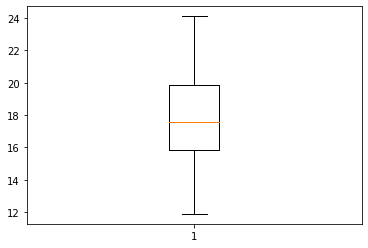

In [1170]:
import numpy as np
import matplotlib.pyplot as plt
print("Pięciopunktowe podsumowanie:")
print(np.min(X))
print(np.max(X))
print(np.std(X))
print(np.mean(X))
print(np.median(X))
plt.boxplot(X)
plt.show()

#### d)

In [1171]:
import numpy as np
q3, q1 = np.percentile(X, [75, 25])
iqr = q3 - q1
print(iqr)

4.049999999999999


#### e)

Histogram nie wspiera tego stwierdzenia


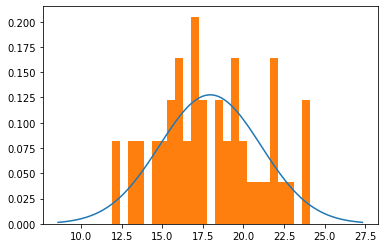

In [1172]:
#Rysuję histogram gęstości
# i wykres gęstości rozkładu normalnego o średniej i odchyleniu standardowym wyliczonym dla zbioru X
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  norm
print("Histogram nie wspiera tego stwierdzenia")
b = int(X.size / 2)
mu = X.mean()
sigma = X.std()
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.hist(X, bins=b, density=True)
plt.show()

# Zadanie 5
### Zestaw 10 zadanie 8
Poniższy zbiór danych reprezentuje liczbę nowych kont komputerowych
założonych przez administratora w ciągu 10 kolejnych dni:

43, 37, 50, 51, 58, 105, 52, 45, 45, 10.

a) Oblicz średnią, medianę, kwartyle i odchylenie standardowe.

b) Sprawdź istnienie wartości odstających używając reguły 1.5 𝐼𝑄𝑅.

c) Usuń wykryte wartości odstające i ponownie oblicz statystyki z punktu a).

d) Przedyskutuj wpływ efektu wartości odstających na statystyki opisowe.

In [1173]:
import numpy as np
X = np.array([43, 37, 50, 51, 58, 105, 52, 45, 45, 10])

#### a)

In [1174]:
import numpy as np
def param(X):
    print("średnia: ", np.mean(X))
    print("mediana: ", np.median(X))
    print("odchylenie standardowe: ", np.std(X))
    q = np.quantile(X, [0.25, 0.5, 0.75])
    print("kwartyle: ", q)
param(X)

średnia:  49.6
mediana:  47.5
odchylenie standardowe:  22.27195545972558
kwartyle:  [43.5  47.5  51.75]


#### b)

In [1175]:
import numpy as np
# wyliczam wartości które wystają poza przedział [Q1 - 1.5 * IQR , Q3 + 1,5*IQR]
# gdzie IQR = Q3 - Q1
print("Tak, są to:")
def wartosci_odsatjace(X):
    q3, q1 = np.percentile(X, [75, 25])
    iqr = q3 - q1
    q = np.quantile(X, [0.25, 0.5, 0.75])
    return [i for i in X if (i < + q[0] - 1.5 * iqr or i > 1.5 * iqr + q[2])]
print(wartosci_odsatjace(X))

Tak, są to:
[105, 10]


#### c)

In [1176]:
import numpy as np
# Usuwam wartości odstające i wyliczam parametry wedle podpunktu a)
X1 = X[~np.in1d(X, wartosci_odsatjace(X))]
print(X1)
param(X1)

[43 37 50 51 58 52 45 45]
średnia:  47.625
mediana:  47.5
odchylenie standardowe:  6.040229714174784
kwartyle:  [44.5  47.5  51.25]


#### d)
Średnia, odchylenie standardowe i kwartyle 1 i 3 są wrażliwe na wartości odstające, w przeciwieństwie do mediany(jako kwartyl 2)

# Zadanie 6
### Zestaw 8 zadanie komputerowe

Napisz program, który będzie ilustrował Centralne Twierdzenie Graniczne
poprzez symulację rozkładu sumy 𝑛 zmiennych losowych, z których każda przyjmuj wartość 0, 1, 2, 3
lub 4.

Program na wejściu dostaje 𝑛 oraz rozkład zmiennych $X_i , 𝑖 = 1, … , 𝑛 $

tzn. wartości 𝑝(0), ...,𝑝(4), a na wyjściu rysuje wykres rozkładu prawdopodobieństwa zmiennej
$\\ Y = \sum_{i=1}^n X_i\\ $
(np. poprzez symulację 1000 generacji zmiennej 𝑌).

Wykonaj eksperymenty dla 𝑛 = 5, 10, 25, 100 i dla dowolnego
rozkładu (np. 𝑝(0) = 0.25, 𝑝(1) = 0.15, 𝑝(2) = 0.1, 𝑝(3) = 0.2, 𝑝(4) = 0.3). Zaobserwuj, jak rozkład
zbliża się do normalnego wraz ze wzrostem 𝑛.

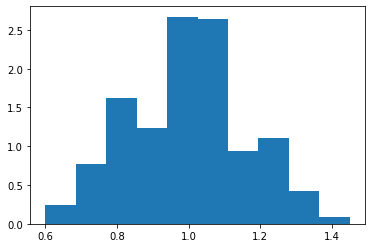

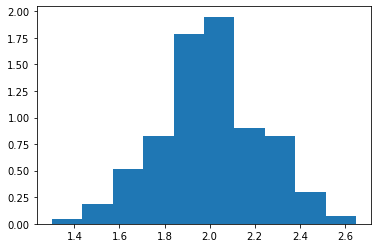

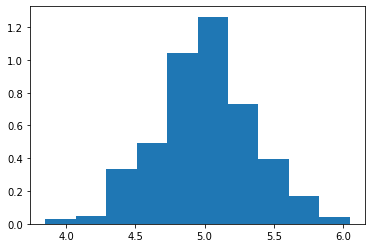

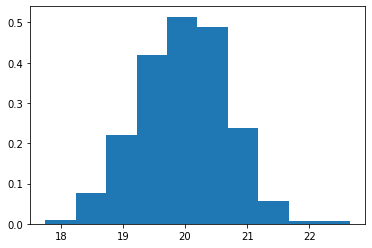

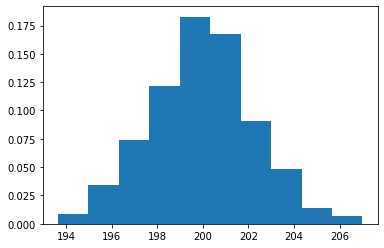

In [1177]:
import random
import matplotlib.pyplot as plt
import numpy as np
# Dla każdej z wartości n z listy N dokonuję 1000 losowań
# Losuję po n wartości ze zbioru 5 prawdopodobieństw, a ich sumę dodaję do listy
# Otrzymane 1000 wyników wizualizuję na histogramie
# Otrzymując wykresy coraz bardziej zbliżone do rozkładu normalnego
N = [5, 10, 25, 100,1000]
P = [0.25,0.15,0.1,0.2,0.3]

def CTG_symulacja(n, probabilities):
    l=[]
    for k in range(1000):
        l.append(sum(random.choices(probabilities,k=n)))
    plt.hist(l,density=True)
    plt.show()
for n in N:
    CTG_symulacja(n,P)

# Zadanie 7
### Zestaw 10 zadanie 7

Poniższy zbiór danych pokazuje populację Stanów Zjednoczonych (w
milionach osób) od roku 1790:
#### Rok 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900
#### Popul. 3.9 5.3 7.2 9.6 12.9 17.1 23.2 31.4 38.6 50.2 63.0 76.2
#### Rok 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010
#### Popul. 92.2 106.0 123.2 132.2 151.3 179.3 203.3 226.5 248.7 281.4 308.7

- a) Skonstruuj wykres przebiegu dla tego zbioru danych i skomentuj go, tzn.: jaki rodzaj trendu
widzisz? Jakie informacje mogą być uzyskane na podstawie tego wykresu?
- b) Oblicz 10-letnie przyrosty populacji: 𝑥1 = 5.3 − 3.9, 𝑥2 = 7.2 − 5.3 itd. Oblicz średnią,
medianę i wariancję z próby dla tych przyrostów. Skomentuj jak populacja USA zmienia się w
ciągu dekady.
- c) Skonstruuj wykres przebiegu dla przyrostów i przedyskutuj zaobserwowany wzorzec.
- d) Oblicz relatywne 10-letnie przyrosty: 𝑦1 =
5.3−3.9/
3.9
, 𝑦2 =
7.2−5.3/
5.3
itd. Oblicz średnią, medianę i
wariancję z próby dla relatywnych 10-letnich przyrostów.
- e) Skonstruuj wykres przebiegu dla relatywnych przyrostów. Jaki trend widzisz teraz?
- f) Porównaj wykresy z punktów c) i e). Jakiego rodzaju korelacji pomiędzy 𝑥𝑖 a 𝑦𝑖 można się
spodziewać na podstawie porównania tych wykresów?
- g) Oblicz współczynnik korelacji 𝑟 =
∑(𝑥𝑖−𝑥̅)(𝑦𝑖−𝑦̅)/(𝑛−1)
𝑠𝑥𝑠𝑦
. Jak wytłumaczysz to zjawisko?

In [1178]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
d = {"Rok":[1790 ,1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
     "Populacja":[3.9, 5.3 ,7.2, 9.6 ,12.9 ,17.1 ,23.2 ,31.4 ,38.6 ,50.2 ,63.0 ,76.2 ,92.2 ,106.0, 123.2 ,132.2 ,151.3 ,179.3 ,203.3 ,226.5 ,248.7 ,281.4 ,308.7]
     }
df = pd.DataFrame(d)

### a)

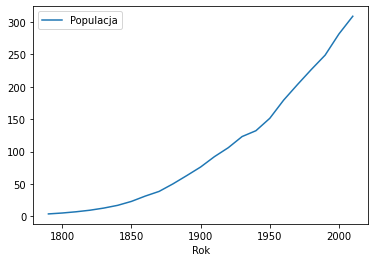

Tendencja jest wzrostowa, populacja rośnie


In [1179]:
df.plot(x='Rok',y='Populacja')
plt.show()
print('Tendencja jest wzrostowa, populacja rośnie')

### b)

In [1180]:
X = df['Populacja'].diff().to_numpy()[1:]
print(X)
print("średnia: ",np.mean(X))
print("mediana: ",np.median(X))
print("wariancja: ",np.var(X))

[ 1.4  1.9  2.4  3.3  4.2  6.1  8.2  7.2 11.6 12.8 13.2 16.  13.8 17.2
  9.  19.1 28.  24.  23.2 22.2 32.7 27.3]
średnia:  13.854545454545455
mediana:  13.0
wariancja:  83.62157024793386


### c)

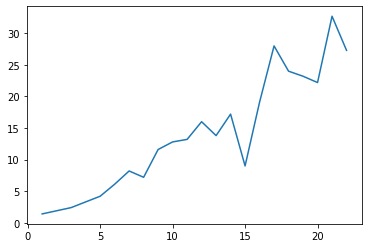

Przyrosty mają tendencję rosnącą, z pewnymi odchyleniami


In [1181]:
X1 = df['Populacja'].diff()[1:]
X1.plot()
plt.show()
print("Przyrosty mają tendencję rosnącą, z pewnymi odchyleniami")

### d)

In [1182]:
Y = df['Populacja'].diff().to_numpy()[1:]
Y = [Y[i]/d['Populacja'][i] for i in  range(Y.size)]
print(X)
print("średnia: ",np.mean(Y))
print("mediana: ",np.median(Y))
print("wariancja: ",np.var(Y))

[ 1.4  1.9  2.4  3.3  4.2  6.1  8.2  7.2 11.6 12.8 13.2 16.  13.8 17.2
  9.  19.1 28.  24.  23.2 22.2 32.7 27.3]
średnia:  0.22380057356285804
mediana:  0.20974878140232472
wariancja:  0.009784453545810657


### e)

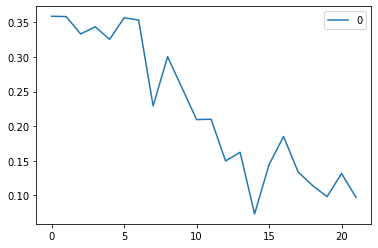

Przyrosty relatywne mają tendencję malejącą


In [1183]:
pd.DataFrame(Y).plot()
plt.show()
print("Przyrosty relatywne mają tendencję malejącą")

### f)

In [1184]:
print("Należy spodziewać się ujemnego współczynnika korelacji")

Należy spodziewać się ujemnego współczynnika korelacji


### g)

In [1185]:
#Średnie
xm=np.mean(X)
ym=np.mean(Y)
r =0
# Licząc wprost ze wzoru
for i in range(X.size):
    r+=(X[i]-xm)*(Y[i]-ym)/((X.size -1)*statistics.stdev(X)*statistics.stdev(Y))
print(r)
# Używając macierzy korealcji Pearsona
np.corrcoef(X,Y)

-0.7884204073309351


array([[ 1.        , -0.78842041],
       [-0.78842041,  1.        ]])

# Zadanie 8

### Zestaw 2 zadanie 9

Rozważ grę wykorzystującą generator liczb losowych losujący w
sposób niezależny i równomierny liczby losowe z ciągłego przedziału między 1 a 100. Gra zaczyna się
z sumą 𝑆 = 0. Pierwszy gracz dodaje do S liczby losowe wygenerowane kolejno z generatora, dopóki
𝑆 > 100, i zapisuje ostatnią wygenerowaną liczbę 𝑥. Następnie, gracz drugi kontynuuje dodawanie do
S liczb losowych z generatora, dopóki 𝑆 > 200, i zapisuje ostatnią wygenerowaną liczbę 𝑦. Gracz z
większą liczbą wygrywa, np. jeśli 𝑦 > 𝑥, to wygrywa gracz drugi. Czy gra jest sprawiedliwa? Napisz
program symulujący 100,000 gier i oszacuj za jego pomocą, z dokładnością do 3 miejsc po przecinku,
prawdopodobieństwo, że gracz drugi wygra.

In [1192]:
import random
wins=[]
N= 100000
# Dla każdej ze 100 000 grają obaj gracze, jak y>x liczbę to wygrywa 2 gracz
for i in range(N):
    S = 0
    x = 0
    while S<=100:
        x = random.randint(1,100)
        S+=x
    y=0
    while S<=200:
        y = random.randint(1,100)
        S+=y
    if y>x:
        wins.append(1)
    else:
        wins.append(0)
# Suma jedynek to liczba zwycięstw 2 gracza
print("Gra nie jest do końca sprawiedliwa. W ",sum(wins)/N*100,"% wygrywa drugi gracz")

Gra nie jest do końca sprawiedliwa. W  52.108 % wygrywa drugi gracz
